<a href="https://colab.research.google.com/github/akita-NITIC/dsp/blob/main/%E3%83%87%E3%82%A3%E3%82%B8%E3%82%BF%E3%83%AB%E4%BF%A1%E5%8F%B7%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0．初期設定・matplotlib参照

0.1 matplotで日本語を使用したいときは，以下を実行してください。

In [ ]:
!pip install japanize_matplotlib

0.2 matplotlib参照(1)；設定

1.   Parts of a Figure
>![fig_map[1].png](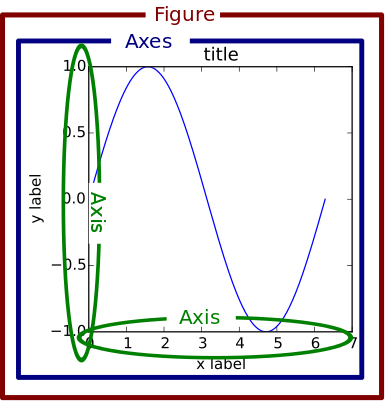)



2.   Figure
>*   Create a new figure, or activate an existing figure.
>>[matplotlib.pyplot.figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
>
>*   Add a centered suptitle to the figure.
>>[matplotlib.pyplot.suptitle()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html)
>
>*   Adjust the padding between and around subplots.
>>[matplotlib.figure.Figure.tight_layout()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout)
>
>*   If using a GUI backend with pyplot, display the figure window.
>>[matplotlib.figure.Figure.show()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.show)
>
>*   Save the current figure.
>>[matplotlib.figure.Figure.savefig()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig)
>


3.   Axes
>*   Add an Axes to the figure as part of a subplot arrangement.
>>[matplotlib.figure.Figure.add_subplot()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot)
>
>*   Configure the grid lines.
>>[matplotlib.axes.Axes.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)
>
>*   Change the appearance of ticks, tick labels, and gridlines.
>>[matplotlib.axes.Axes.tick_params()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)
>
>*   Place a legend on the Axes.
>>[matplotlib.axes.Axes.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)
>
>*   Set a title for the Axes.
>>[matplotlib.axes.Axes.set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)

4.   Axis
>*   Set the x-axis view limits.
>>[matplotlib.axes.Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
>
>*   Set the y-axis view limits.
>>[matplotlib.axes.Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html)
>
>*   Set the label for the x-axis.
>>[matplotlib.axes.Axes.set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)
>
>*   Set the label for the y-axis.
>>[matplotlib.axes.Axes.set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)
>
>*   Convenience method to get or set some axis properties.
>>[matplotlib.axes.Axes.axis()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html)
>

0.3 matplotlib参照(2)；グラフ
1.   stem(幹）グラフ
>*  Create a stem plot.
>>[matplotlib.axes.Axes.stem()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html)
>
2.   折れ線グラフ
>*  Plot y versus x as lines and/or markers.
>>[matplotlib.axes.Axes.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
>

# 1．基本的な離散時間信号

1.1 単位インパルス信号


> $
 \delta[n] = \left\{ \begin{array}{rr}
 1 & ( n = 0 ) \\
 0 & ( n \neq 0 )
 \end{array} \right.         
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

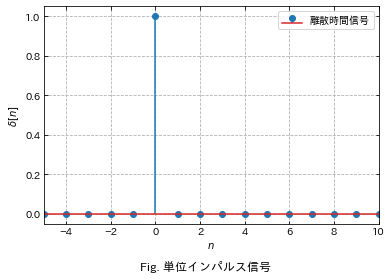

In [46]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 離散時間のデータ
n = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# 単位インパルス信号のデータ
delta = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# グラフ描画設定
fig_title = 'Fig. 単位インパルス信号'           # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(-5, 10)                             # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('$n$')                            # 横軸(x軸)のラベル
ax.set_ylabel('$\delta[n]$')                    # 横軸(x軸)のラベル
# グラフ描画
stem_label = '離散時間信号'                                         # グラフのラベル名
ax.stem(n, delta, label = stem_label, use_line_collection = True)   # stem(幹)グラフを描画
ax.legend(loc = 'upper right')                                      # 右上に凡例表示
# グラフの保存とダウンロード
savefilename = 'delta.png'       # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

1.2 単位ステップ信号


> $
 u[n] = \left\{ \begin{array}{rr}
 1 & ( n \geq 0 ) \\
 0 & ( n < 0 )
 \end{array} \right.         
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

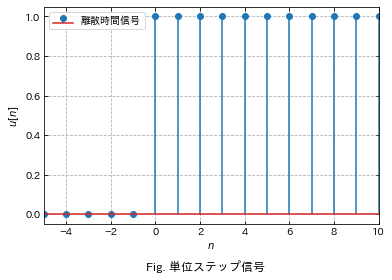

In [35]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 離散時間のデータ
n = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# 単位ステップ信号のデータ
unitstep = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# グラフ描画設定
fig_title = 'Fig. 単位ステップ信号'             # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(-5, 10)                             # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('$n$')                            # 横軸(x軸)のラベル
ax.set_ylabel('$u[n]$')                         # 横軸(x軸)のラベル
# グラフ描画
stem_label = '離散時間信号'                                             # グラフのラベル名
ax.stem(n, unitstep, label = stem_label, use_line_collection = True)    # stem(幹)グラフを描画
ax.legend()                                                             # 凡例表示(auto)
# グラフの保存とダウンロード
savefilename = 'step.png'       # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

1.3 正弦波信号


> $
 y[n] = A \, sin ( \omega\,^{\prime} n + \theta )
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

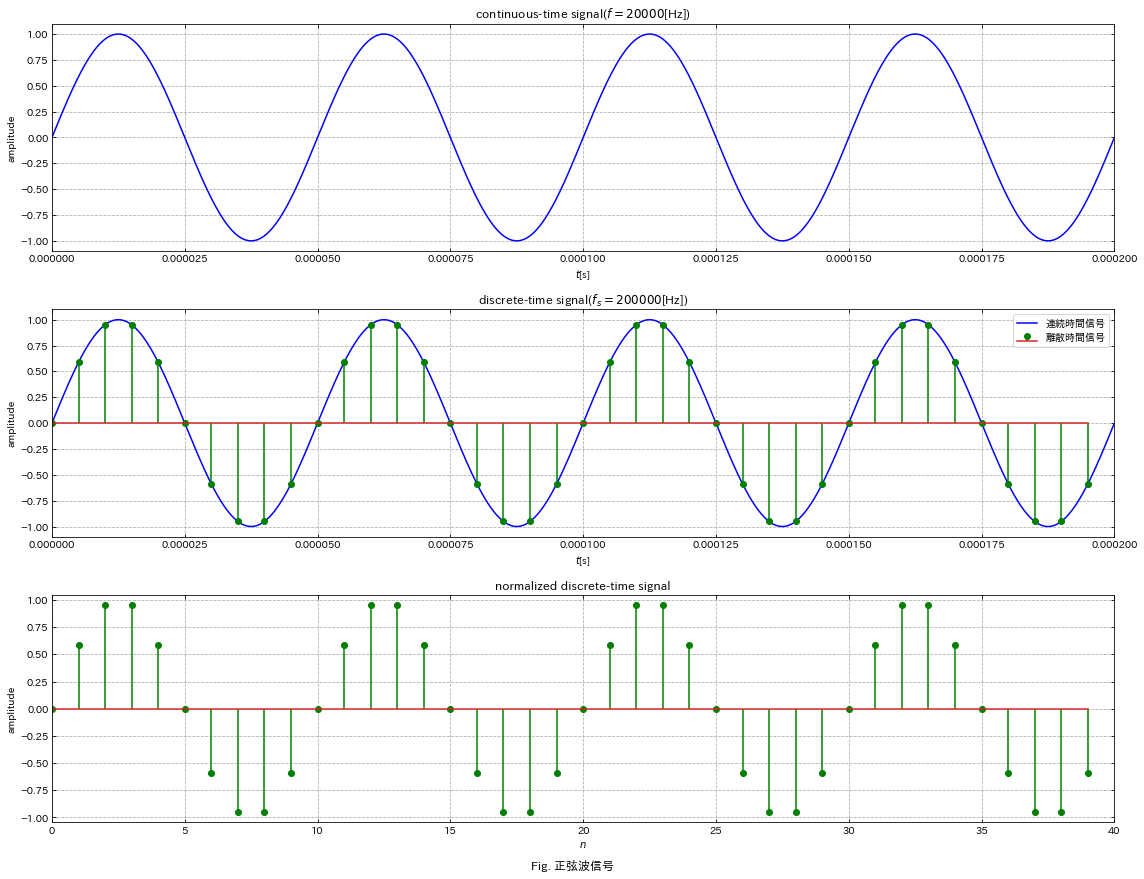

In [70]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 連続時間信号パラメータ
signal_amp = 1.0                            # 信号波の振幅 -> 1.0
signal_freq = 20e3                          # 信号波の周波数[Hz] -> 20 kHz 
signal_phi = 0.0                            # 信号波の初期位相[deg] -> 0 deg
duration = 0.2e-3                           # 信号の期間[s] -> 0.2 ms
sample_rate4cnt = 1/ (duration / (2**12))   # 連続時間信号描画用サンプリング・レート[Hz] -> 細かくすること（分解能12ビット）で描画上ほぼ連続
# 正弦波信号（連続時間）のデータ
t = np.arange(0, duration, 1 / sample_rate4cnt)                                                 # 時間のデータ
signal_cnt = signal_amp * np.sin(2.0 * np.pi * signal_freq * t + signal_phi / 180.0 * np.pi)    # 連続時間正弦波信号

# 離散時間信号パラメータ
sample_freq = 200e3                         # サンプリング周波数[Hz] -> 200 kHz
n_nend = duration * sample_freq             # 信号の期間の最後のデータ位置
# 正弦波信号（離散時間）のデータ
n = np.arange(0, duration, 1/ sample_freq)                                                      # 時間のデータ
signal_dis = signal_amp * np.sin(2.0 * np.pi * signal_freq * n + signal_phi / 180.0 * np.pi)    # 離散時間正弦波信号
n_n = n * sample_freq                                                                           # 時間のデータ(正規化)

# グラフ描画設定
fig_title = 'Fig. 正弦波信号'                                       # figureオブジェクトタイトル
fig = plt.figure(figsize = (16, 12))                                # figureオブジェクト(オブジェクト名=fig)作成，サイズ指定あり
fig.suptitle(fig_title, x = 0.5, y = 0)                             # figオブジェクト内の指定位置(中央下部)にタイトル表示
## 連続時間正弦波信号(グラフ描画設定)
ax1 = fig.add_subplot(311)                                          # figに属するAxesオブジェクト(オブジェクト名=ax1)を3行1列1番目に作成
ax1.grid(linestyle='--')                                            # 目盛線(破線)
ax1.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax1.set_xlim(0, duration)                                           # 横軸(x軸)の目盛範囲
ax1.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax1.set_xlabel('$t$[s]')                                            # 横軸(x軸)のラベル
ax1.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax1_title = 'continuous-time signal($f = %.0f$[Hz])'%(signal_freq)  # ax1オブジェクトタイトル
ax1.set_title(ax1_title)                                            # グラフタイトル
## 連続時間正弦波信号(グラフ描画)
ax1.plot(t, signal_cnt, 'b')                                        # 折れ線グラフを描画
## 離散時間正弦波信号(グラフ描画設定)
ax2 = fig.add_subplot(312)                                          # figに属するAxesオブジェクト(オブジェクト名=ax2)を3行1列2番目に作成
ax2.grid(linestyle='--')                                            # 目盛線(破線)
ax2.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax2.set_xlim(0, duration)                                           # 横軸(x軸)の目盛範囲
ax2.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax2.set_xlabel('$t$[s]')                                            # 横軸(x軸)のラベル
ax2.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax2_title = 'discrete-time signal($f_s = %.0f$[Hz])'%(sample_freq)  # ax2オブジェクトタイトル
ax2.set_title(ax2_title)                                            # グラフタイトル
## 離散時間正弦波信号(グラフ描画)
plot_label = '連続時間信号'                                         # グラフのラベル名
stem_label = '離散時間信号'                                         # グラフのラベル名
ax2.plot(t, signal_cnt, 'b', label = plot_label)                    # 折れ線グラフを描画
ax2.stem(n, signal_dis, linefmt = 'g', markerfmt ='go', label = stem_label, use_line_collection = True) # stem(幹)グラフを描画
ax2.legend()                                                        # 凡例表示(auto)
## 正規化離散時間正弦波信号(グラフ描画設定)
ax3 = fig.add_subplot(313)                                          # figに属するAxesオブジェクト(オブジェクト名=ax3)を3行1列3番目に作成
ax3.grid(linestyle='--')                                            # 目盛線(破線)
ax3.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax3.set_xlim(0, n_nend)                                             # 横軸(x軸)の目盛範囲
ax3.set_ylim(auto = True)                                           # 縦軸(y軸)の目盛範囲
ax3.set_xlabel('$n$')                                               # 横軸(x軸)のラベル
ax3.set_ylabel('amplitude')                                         # 縦軸(y軸)のラベル
ax3_title = 'normalized discrete-time signal'                       # ax3オブジェクトタイトル
ax3.set_title(ax3_title)                                            # グラフタイトル
## 正規化離散時間正弦波信号(グラフ描画)
ax3.stem(n_n, signal_dis, linefmt= 'g', markerfmt='go', use_line_collection = True) # stem(幹)グラフを描画
# グラフ描画再設定
fig.tight_layout()              # グラフ描画領域が重複しないようにレイアウト調整
fig.show()                      # すべてのfigオブジェクトを表示
# グラフの保存とダウンロード
savefilename = 'sin_wave.png'   # 保存ファイル名
fig.savefig(savefilename)       # グラフの保存
files.download(savefilename)    # 保存したファイルをローカルマシンに保存

# 課題1

>10 kHzの正弦波信号を以下の条件によるサンプリングを行ったときの正規化離散時間信号の波形を作成しなさい。
>
>＜条件＞
>
>　・ 出席番号を$x$とするとき，サンプリング周波数$f_s=10x+100$ [kHz]とする。
>
>　・ 時間の期間（データ数）や正弦波信号の振幅・初期位相は任意とする。




# 2．極と零点

システムの伝達関数$H(z)$は，入力$X(z)$と出力$Y(z)$を用いて次式で表される。

> $H(z) = \frac{X(z)}{Y(z)} $

$H(z)=0$となる$z$の値を零点(zero)，$H(z)=\infty$となる$z$の値を極(pole)という。

すべての極が複素単位円の内部（境界は含まない）であれば，システムは安定する。


（例）以下の伝達関数$H(z)$の零点と極を求め，複素数平面上に配置を図示しなさい。

　$H(z)=\frac{X(z)}{Y(z)}=\frac{1+2z^{-1}+z^{-2}}{1-z^{-1}+0.75z^{-2}}=\frac{z^2+2z+1}{z^2-z+0.75}$

zero =  [-1. -1.]
pole =  [0.5+0.70710678j 0.5-0.70710678j]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

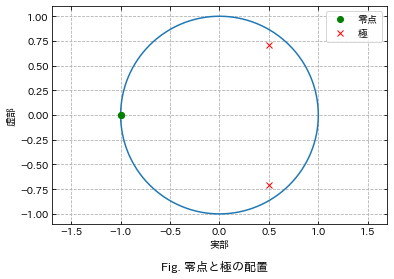

In [58]:
import numpy as np                  # 数値計算ライブラリnumpyを別名npとして読み込み
import matplotlib.pyplot as plt     # グラフ描画ライブラリmatplotlib.pyplotを別名pltとして読み込み
import japanize_matplotlib          # matplot用日本語フォントを読み込み（要環境設定）
from google.colab import files      # ローカルファイルシステム関連

# 伝達関数
xz = np.array([1, 2, 1])            # 分子の係数
yz = np.array([1, -1, 0.75])        # 分母の係数
# 零点
zero = np.roots(xz)                 # 零点の計算(xzの根)
print('zero = ', zero)              # 零点の結果出力
# 極
pole = np.roots(yz)                 # 極の計算(yzの極)
print('pole = ', pole)              # 極の結果出力

# グラフ描画設定
fig_title = 'Fig. 零点と極の配置'               # figureオブジェクトタイトル
fig = plt.figure()                              # figureオブジェクト(オブジェクト名=fig)作成
plt.suptitle(fig_title, x = 0.5, y = 0)         # figオブジェクト内の指定位置(中央下部)にタイトル表示
ax = fig.add_subplot(111)                       # figに属するAxesオブジェクト(オブジェクト名=ax)を1行1列1番目に作成
ax.grid(linestyle='--')                         # 目盛線(破線)
ax.tick_params(direction = "in", top = True, bottom = True, left = True, right = True)  # 目盛設定(向き；内側"in"か外側"out"かその両方"inout"か,上下左右各軸目盛あり)
ax.set_xlim(auto = True)                        # 横軸(x軸)の目盛範囲
ax.set_ylim(auto = True)                        # 縦軸(y軸)の目盛範囲
ax.set_xlabel('実部')                           # 横軸(x軸)のラベル
ax.set_ylabel('虚部')                           # 横軸(x軸)のラベル
ax.axis('equal')                                # 軸の設定(両軸のスケールが等しい)
# グラフ描画
__theta = np.linspace(-np.pi, np.pi, 2**10, endpoint = False)    
uc = np.exp(1j * __theta)                                       # 単位円のデータ計算
ax.plot(np.real(uc), np.imag(uc), '-')                          # 単位円の描画
ax.plot(np.real(zero), np.imag(zero), 'go', label ='零点')      # 零点の描画
ax.plot(np.real(pole), np.imag(pole), 'rx', label ='極')        # 極の描画
ax.legend()                                                     # 凡例表示(auto)
# グラフの保存とダウンロード
savefilename = 'zero_pole.png'      # 保存ファイル名
fig.savefig(savefilename)           # グラフの保存
files.download(savefilename)        # 保存したファイルをローカルマシンに保存

# 課題2

>伝達関数$H(z)$が以下の式および条件で与えられるとき，零点および極を求め，複素数平面上に図示しなさい。
>
> $H(z) = \frac{a+bz^{-1}}{1+cz^{-1}+dz^{-2}} $
>
>＜条件＞
>
>　・ 出席番号の10の位の数を$x$，1の位の数を$y$としたとき，定数$a$，$b$，$c$，$d$を以下のとおりとする。
>
>　　$a = x$，$b = y$，$c = x + y$，$d = x - y$
>
>（例）出席番号が1番の場合：$x = 0$，$y = 1$
>
>　　$a = x = 0$，　$b = y = 1$，　$c = x + y = 0 + 1 = 1$，　$d = x - y = 0 - 1 = -1 $
>
>（例）出席番号が51番の場合：$x = 5$，$y = 1$
>
>　　$a = x = 5$，　$b = y = 1$，　$c = x + y = 5 + 1 = 6$，　$d = x - y = 5 - 1 = 4 $